# Coding......

## Search Policy

In [18]:
import re
import math
import networkx as nx
import matplotlib.pyplot as plt
import random
from collections import defaultdict
from sklearn.datasets import load_boston

In [3]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

#### Input: string -> dict

In [4]:
test_string = "{name:'澳门', geoCoord:[113.54, 22.19]}"

In [6]:
pattern = re.compile(r"name:'(\w+)',\s+geoCoord:\[(\d+.\d+),\s(\d+.\d+)\]")

In [9]:
re.findall(pattern, test_string)[0]

('澳门', '113.54', '22.19')

In [11]:
pattern.findall(test_string)[0]

('澳门', '113.54', '22.19')

In [14]:
city_location = {}
for line in coordination_source.split('\n'):
    city_info = pattern.findall(line)
    
    if not city_info: continue
    city, long, lat = city_info[0]
    long, lat = float(long), float(lat)
    city_location[city] = (long, lat)

In [15]:
city_location

{'兰州': (103.73, 36.03),
 '嘉峪关': (98.17, 39.47),
 '西宁': (101.74, 36.56),
 '成都': (104.06, 30.67),
 '石家庄': (114.48, 38.03),
 '拉萨': (102.73, 25.04),
 '贵阳': (106.71, 26.57),
 '武汉': (114.31, 30.52),
 '郑州': (113.65, 34.76),
 '济南': (117.0, 36.65),
 '南京': (118.78, 32.04),
 '合肥': (117.27, 31.86),
 '杭州': (120.19, 30.26),
 '南昌': (115.89, 28.68),
 '福州': (119.3, 26.08),
 '广州': (113.23, 23.16),
 '长沙': (113.0, 28.21),
 '海口': (110.35, 20.02),
 '沈阳': (123.38, 41.8),
 '长春': (125.35, 43.88),
 '哈尔滨': (126.63, 45.75),
 '太原': (112.53, 37.87),
 '西安': (108.95, 34.27),
 '台湾': (121.3, 25.03),
 '北京': (116.46, 39.92),
 '上海': (121.48, 31.22),
 '重庆': (106.54, 29.59),
 '天津': (117.2, 39.13),
 '呼和浩特': (111.65, 40.82),
 '南宁': (108.33, 22.84),
 '西藏': (91.11, 29.97),
 '银川': (106.27, 38.47),
 '乌鲁木齐': (87.68, 43.77),
 '香港': (114.17, 22.28),
 '澳门': (113.54, 22.19)}

In [20]:
def get_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    #longitude latitude 
    lat1 ,lon1 = origin
    lat2, lon2 = destination
    radius = 6371 #km
    
    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c
    
    return d

In [18]:
def get_geo_distance(city1, city2):
    return get_distance(city_location[city1], city_location[city2])

In [21]:
get_geo_distance('北京','上海')

727.52769688981

In [25]:
city_graph = nx.Graph()

In [26]:
city_graph.add_nodes_from(list(city_location.keys()))

In [28]:
%matplotlib inline

In [31]:
plt.rcParams['font.sans-serif']=['SimHei']

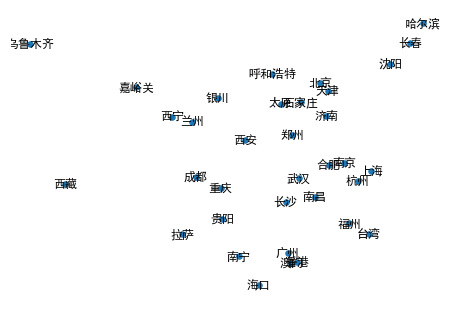

In [34]:
nx.draw(city_graph, city_location, with_labels=True, node_size=30)

In [39]:
simple_connection_info = {
    '北京': ['太原', '沈阳'],
    '太原': ['北京', '西安', '郑州'],
    '兰州': ['西安'],
    '郑州': ['太原'],
    '西安': ['兰州', '长沙'],
    '长沙': ['福州', '南宁'],
    '沈阳': ['北京']
}

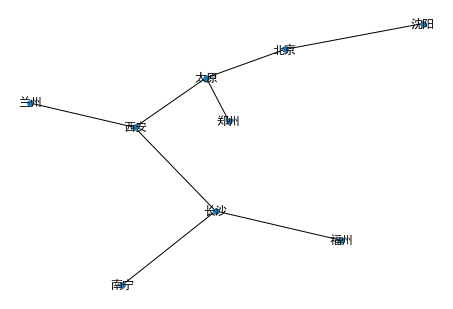

In [41]:
nx.draw(nx.Graph(simple_connection_info), city_location, with_labels=True, node_size=30)

In [48]:
def search(start, destination, connection_graph, sort_candidate):
    pathes = [[start]]
    
    visited = set()
    while pathes: #we find pathes
        path = pathes.pop(0)
        frontier = path[-1]
        
        if frontier in visited: continue
        successors = connection_graph[frontier]
        
        for city in successors:
            if city in path: continue
            new_path = path + [city]
            pathes.append(new_path)
            
            if city == destination: return new_path
        
        visited.add(frontier)
        
        pathes = sort_candidate(pathes) #增加一个排序函数，对结果进行排序

In [42]:
def transfer_station_first(pathes):
    return sorted(pathes, key=len)

In [44]:
def transfer_as_much_as_possible(pathes):
    return sorted(pathes, key=len, reverse=True)

In [46]:
def shortest_path_first(pathes):
    if len(pathes) <=1 : return pathes
    
    def get_path_distance(path):
        distance = 0
        for i in len(pathes):
            distance += get_geo_distance(pathes[i] + pathes[i + 1])
        #for station in path[:-1]:
        #    distance += get_geo_distance(station, path[-1])
            
        return distance
    
    return sorted(pathes, key=get_path_distance)

In [49]:
search('兰州', '福州', simple_connection_info, sort_candidate=shortest_path_first)

['兰州', '西安', '长沙', '福州']

In [50]:
def pretty_print(cities):
    print('🚗->'.join(cities))

In [51]:
pretty_print(search('兰州', '福州', simple_connection_info, sort_candidate=shortest_path_first))

兰州🚗->西安🚗->长沙🚗->福州


In [57]:
city_connection = defaultdict(list)

In [58]:
for c1 in city_location:
    for c2 in city_location:
        if c1 == c2: continue
        
        distance = get_geo_distance(c1, c2)
        
        if distance < 300:
            city_connection[c1].append(c2)
            city_connection[c2].append(c1)

In [59]:
city_connection

defaultdict(list,
            {'兰州': ['西宁', '成都', '银川', '西宁', '成都', '银川'],
             '西宁': ['兰州', '兰州', '成都', '拉萨', '成都', '拉萨'],
             '成都': ['兰州', '西宁', '兰州', '西宁', '拉萨', '重庆', '拉萨', '重庆'],
             '银川': ['兰州', '重庆', '兰州', '重庆'],
             '拉萨': ['西宁', '成都', '西宁', '成都'],
             '重庆': ['成都', '贵阳', '成都', '贵阳', '银川', '银川'],
             '石家庄': ['郑州', '济南', '太原', '北京', '郑州', '济南', '太原', '北京'],
             '郑州': ['石家庄', '武汉', '石家庄', '武汉', '长沙', '太原', '长沙', '太原'],
             '济南': ['石家庄', '石家庄', '合肥', '北京', '天津', '合肥', '北京', '天津'],
             '太原': ['石家庄', '郑州', '石家庄', '郑州', '呼和浩特', '呼和浩特'],
             '北京': ['石家庄', '济南', '石家庄', '济南', '天津', '天津'],
             '贵阳': ['重庆', '南宁', '重庆', '南宁'],
             '南宁': ['贵阳', '海口', '贵阳', '海口'],
             '武汉': ['郑州', '南昌', '长沙', '郑州', '南昌', '长沙'],
             '南昌': ['武汉', '合肥', '武汉', '合肥'],
             '长沙': ['武汉',
              '郑州',
              '广州',
              '武汉',
              '郑州',
              '广州',


In [61]:
pretty_print(search('北京', '广州', city_connection, sort_candidate=transfer_station_first))

北京🚗->石家庄🚗->郑州🚗->长沙🚗->广州


In [63]:
pretty_print(search('北京', '广州', city_connection, sort_candidate=transfer_as_much_as_possible))

北京🚗->石家庄🚗->郑州🚗->武汉🚗->长沙🚗->广州


### 正则略过，直接应用

### Machine Learning

In [2]:
data = load_boston()

In [7]:
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [8]:
x, y = data['data'], data['target']

In [15]:
print(len(x), len(y))

506 506


In [11]:
x[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [12]:
y[0]

24.0

In [16]:
%matplotlib inline

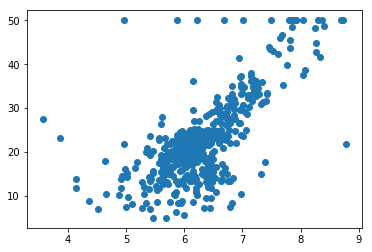

In [20]:
plt.scatter(x[:, 5], y) 

In [19]:
def price(rm, k, b):
    #f(x) = kx + b
    return k * rm + b

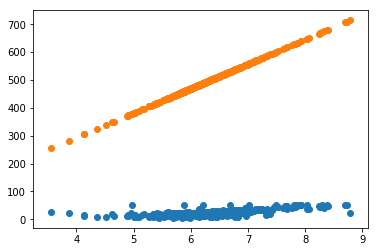

In [32]:
x_rm= x[:, 5]
k = random.randint(-100, 100)
b = random.randint(-100, 100)
price_by_random_k_and_b = [price(r, k, b) for r in x_rm]

plt.scatter(x[:, 5], y)
plt.scatter(x_rm, price_by_random_k_and_b) 

### loss

In [39]:
def loss(y, y_hat):
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

## first-method: random generation: get best k and best b

In [33]:
x_rm= x[:, 5]

In [34]:
x_rm

array([6.575, 6.421, 7.185, 6.998, 7.147, 6.43 , 6.012, 6.172, 5.631,
       6.004, 6.377, 6.009, 5.889, 5.949, 6.096, 5.834, 5.935, 5.99 ,
       5.456, 5.727, 5.57 , 5.965, 6.142, 5.813, 5.924, 5.599, 5.813,
       6.047, 6.495, 6.674, 5.713, 6.072, 5.95 , 5.701, 6.096, 5.933,
       5.841, 5.85 , 5.966, 6.595, 7.024, 6.77 , 6.169, 6.211, 6.069,
       5.682, 5.786, 6.03 , 5.399, 5.602, 5.963, 6.115, 6.511, 5.998,
       5.888, 7.249, 6.383, 6.816, 6.145, 5.927, 5.741, 5.966, 6.456,
       6.762, 7.104, 6.29 , 5.787, 5.878, 5.594, 5.885, 6.417, 5.961,
       6.065, 6.245, 6.273, 6.286, 6.279, 6.14 , 6.232, 5.874, 6.727,
       6.619, 6.302, 6.167, 6.389, 6.63 , 6.015, 6.121, 7.007, 7.079,
       6.417, 6.405, 6.442, 6.211, 6.249, 6.625, 6.163, 8.069, 7.82 ,
       7.416, 6.727, 6.781, 6.405, 6.137, 6.167, 5.851, 5.836, 6.127,
       6.474, 6.229, 6.195, 6.715, 5.913, 6.092, 6.254, 5.928, 6.176,
       6.021, 5.872, 5.731, 5.87 , 6.004, 5.961, 5.856, 5.879, 5.986,
       5.613, 5.693,

In [47]:
trying_times = 2000

min_loss = float('inf')
best_k, best_b = None, None

for i in range(trying_times):
    k = random.random() * 200 - 100
    b = random.random() * 200 - 100
    price_random_by_k_and_b = [price(r, k, b) for r in x_rm]
    
    current_loss = loss(y, price_random_by_k_and_b)
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = k, b
        print('When time is: {}, best_k: {}, best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))

When time is: 0, best_k: -45.316710751705, best_b: -56.263597509709975, and the loss is: 133704.25974207983
When time is: 2, best_k: -20.35725439392337, best_b: 80.17834703709036, and the loss is: 5412.204024617257
When time is: 3, best_k: 8.53730496610163, best_b: 10.891545542736637, and the loss is: 1808.8145666000312
When time is: 25, best_k: 1.1473464111861063, best_b: -14.518736483490827, and the loss is: 965.2561634420783
When time is: 61, best_k: 6.535233720055828, best_b: 0.3344707276924339, and the loss is: 403.0452402497646
When time is: 92, best_k: -2.5252401584673407, best_b: 32.678560446991185, and the loss is: 142.98001180940184
When time is: 218, best_k: -0.6254173308105635, best_b: 29.567558102512294, and the loss is: 99.85798187188907
When time is: 540, best_k: 6.280682609972388, best_b: -19.23550099481062, and the loss is: 52.79659966471955
When time is: 902, best_k: 12.719258863523436, best_b: -57.18836045537752, and the loss is: 50.09297103459825
When time is: 1026,

## second-method: direction adjusting

In [49]:
trying_times = 2000
min_loss = float('inf')

best_k = random.random() * 200 - 100
best_b = random.random() * 200 - 100

direction = [
    #k, b
    (1, -1),
    (1, 1),
    (-1, -1),
    (-1, 1)
]

next_direction = random.choice(direction)

scalar = 0.1

for i in range(trying_times):
    k_direction, b_direction = next_direction
    
    current_k, current_b = best_k + k_direction * scalar, best_b + b_direction * scalar
    
    price_by_k_and_b = [price(r, current_k, current_b) for r in x_rm]
    
    current_loss = loss(y, price_by_k_and_b)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = current_k, current_b
        print('When time is: {}, best_k: {}, best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))
    else:
        next_direction = random.choice(direction)

When time is: 0, best_k: 17.7445309523032, best_b: -69.30112924610505, and the loss is: 467.8587143579498
When time is: 1, best_k: 17.6445309523032, best_b: -69.20112924610505, and the loss is: 446.4867990555589
When time is: 2, best_k: 17.544530952303198, best_b: -69.10112924610506, and the loss is: 425.6832848696499
When time is: 3, best_k: 17.444530952303197, best_b: -69.00112924610507, and the loss is: 405.4481718002238
When time is: 4, best_k: 17.344530952303195, best_b: -68.90112924610507, and the loss is: 385.78145984728013
When time is: 5, best_k: 17.244530952303194, best_b: -68.80112924610508, and the loss is: 366.6831490108181
When time is: 6, best_k: 17.144530952303192, best_b: -68.70112924610508, and the loss is: 348.15323929083786
When time is: 7, best_k: 17.04453095230319, best_b: -68.60112924610509, and the loss is: 330.1917306873406
When time is: 8, best_k: 16.94453095230319, best_b: -68.5011292461051, and the loss is: 312.7986232003256
When time is: 9, best_k: 16.84453